# Funkce a broadcasting NumPy


## 1. Vykreslení sinusovky
Vykreslíme sinusovku
$$ y= sin(x+2 + 1) + 1 $$


In [9]:
### 
import numpy as np
import matplotlib.pyplot as plt
from math import sin


Sinusovku vypočítáme a zakreslíme do grafu

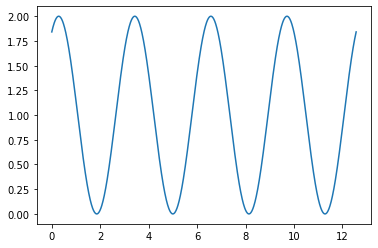

In [10]:
x = np.linspace(0, 4 * np.pi, 1000) ###
y = np.sin(x*2 + 1) + 1

plt.plot(x, y)
plt.show()

## 2. Výpočet charakteristiky RC článku (komplexní čísla)
Vyřešme RC článek v střídavém napětí. Víme (z elektroniky), že je to možné řešit v oblasti komplexních čísel. 

$$Z_R = R$$
$$Z_C = \frac{1}{j \omega C}$$

$$\omega = 2\pi f$$

![RC článek](https://upload.wikimedia.org/wikipedia/commons/e/e0/RC_Series_Filter_%28with_V%26I_Labels%29.svg)

Kombinací Ohmova a Kirchhofova zákona určíme, jak vypadá napětí $V_C$.
$$V_C = Z_C \cdot \frac{V_{in}}{Z_R + Z_C}$$
a podíváme se na přenosovou charekteristiku (tj $V_C$ v závisloti na frekvenci).

$$Z_C = \frac{1}{j \cdot 2  \pi f C}$$


In [11]:
# TODO: definice frekvencí (logspace od 10**-1 po 10**3) a impendance Z_C pro C=10e-3
f = np.logspace(1, 5, base=10)

V_in = 5 ### 5 V vstup ###
Z_R = 100 ### 100 ###
Z_C = 1/(2*np.pi*1j*f*10e-6)

U_C = Z_C * V_in / (Z_R + Z_C) ###

Nyní můžeme hodnotu $U_C$ vykreslit. Abychom mohli vykreslit komplexní číslo, musíme samostatně zobrazit jeho absolutní hodnotu (`np.abs`) a úhel (`np.angle`).

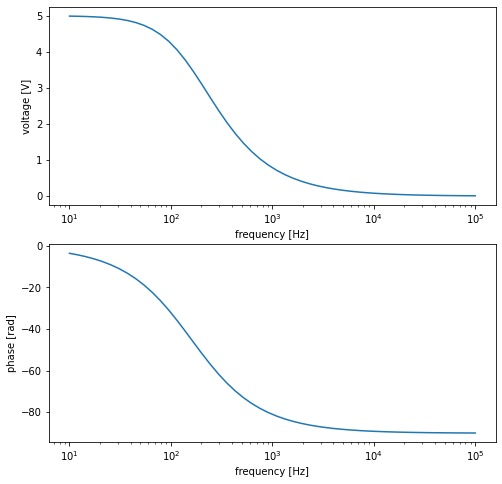

In [12]:
###
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.plot(f, np.abs(U_C)) # Pozor - museli jsme udelat absolutni hodnotu
ax1.set(
    xscale="log",
    xlabel="frequency [Hz]",
    ylabel="voltage [V]")

ax2.plot(f, np.angle(U_C) / np.pi * 180)
ax2.set(
    xscale="log",
    xlabel="frequency [Hz]",
    ylabel="phase [rad]")

plt.show()

## 3 - kreslení 2-dimenzionálních funkcí

Budeme vizualizovat tuto funkci (jako heatmapu)
$$f(x, y) = sin(x) + cos(y) \cdot x$$
pro $x, y \in (-\pi, \pi)$

In [13]:
# Vytvoříme lineární prostor X a Y
X = np.linspace(-np.pi, np.pi, 50)
Y = np.linspace(-np.pi, np.pi, 50)

In [14]:
###
# spatny zpusob
def calc_v1(X, Y):
    Z1 = np.empty((Y.shape[0], X.shape[0]))
    for ix, x in enumerate(X):
        for iy, y in enumerate(Y):
            Z1[iy, ix] = np.sin(x) + np.cos(y) * x
    return Z1
Z1 = calc_v1(X, Y)

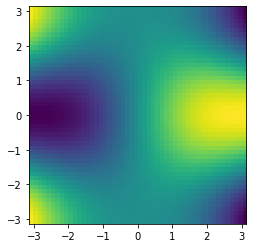

In [15]:
###
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(Z1, extent=[-3.14, 3.14,-3.14, 3.14])
plt.show()

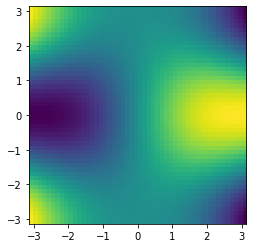

In [16]:
# muzeme vsak vyjit z predchazejiciho a Y neiterovat
def calc_v2(X, Y): ###
    Z1 = np.empty((Y.shape[0], X.shape[0])) ###
    for ix, x in enumerate(X): ###
        for iy, y in enumerate(Y): ###
            Z1[iy, ix] = np.sin(x) + np.cos(y) * x ###            
# jak to udelat?
        Z1[:, ix] = np.sin(x) + np.cos(Y) * x
    return Z1
Z1 = calc_v2(X, Y) ###
plt.figure() ###
plt.imshow(Z1, extent=[-3.14, 3.14,-3.14, 3.14]) ###
plt.show()###

### Využití b'castu
Jak ale se vyhnout všem smyčkám: Stačilo by vytvořit hodnoty "x" pro celou 2D mřížku a hodnoty Y pro celou mřížku. K tomu použijeme broadcast
![Broadcast](bcast.png)

In [17]:
# S využitím broadcastu však jsme schopni použít jen jednu funkci!
x = X.copy().reshape((1, -1))
y = Y.copy().reshape((-1, 1))

Z2 = np.sin(x) + np.cos(y) * x

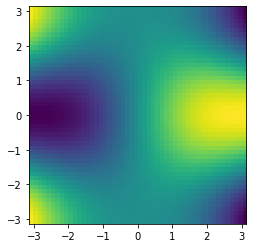

In [18]:
###
plt.figure()
plt.imshow(Z2, extent=[-3.14, 3.14,-3.14, 3.14])
plt.show()

In [19]:
###
# Vysledky by měly odpovídat
np.allclose(Z1, Z2)

True

Pro změnu rozměrů můžeme použít i indexování `y[:, np.newaxis] == y.reshape(-1, 1)`

In [21]:
###
# Co výkonnost?
X = np.linspace(-np.pi, np.pi, 500)
Y = np.linspace(-np.pi, np.pi, 500)

%time calc_v1(X,Y)
%time np.sin(X) + np.cos(Y[:, np.newaxis]) * X

CPU times: user 690 ms, sys: 0 ns, total: 690 ms
Wall time: 690 ms
CPU times: user 975 µs, sys: 0 ns, total: 975 µs
Wall time: 751 µs


array([[ 3.14159265,  3.11640988,  3.0912291 , ..., -3.0912291 ,
        -3.11640988, -3.14159265],
       [ 3.14134361,  3.11616183,  3.09098205, ..., -3.09098205,
        -3.11616183, -3.14134361],
       [ 3.14059652,  3.11541774,  3.09024096, ..., -3.09024096,
        -3.11541774, -3.14059652],
       ...,
       [ 3.14059652,  3.11541774,  3.09024096, ..., -3.09024096,
        -3.11541774, -3.14059652],
       [ 3.14134361,  3.11616183,  3.09098205, ..., -3.09098205,
        -3.11616183, -3.14134361],
       [ 3.14159265,  3.11640988,  3.0912291 , ..., -3.0912291 ,
        -3.11640988, -3.14159265]])